In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [102]:
df = pd.read_csv('ghg-emissions_clean.csv')
df_oldtemp = pd.read_csv('old_temp.csv',index_col=0)
df_oldprec = pd.read_csv('old_prec.csv', index_col=0)
df_newtemp = pd.read_csv('prediction_temp.csv', index_col=0)
df_newprec = pd.read_csv('prediction_prec.csv', index_col=0)

In [4]:
# acortamos el dataframe (df) para estudiar solo nuestros paises de interes (USA, Gernamy, China, UK, India y Rusia)

In [5]:
df_acortado = df[(df['Country/Region']=='United States') | (df['Country/Region'] == 'Russia') | (df['Country/Region'] == 'United Kingdom') | (df['Country/Region'] == 'India') | (df['Country/Region'] == 'Germany') | (df['Country/Region'] == 'China')]

In [6]:
df_acortado

,Unnamed: 0,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,China,MtCO2e,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,1,United States,MtCO2e,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,2,India,MtCO2e,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,3,Russia,MtCO2e,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
8,8,Germany,MtCO2e,1109.28,1079.69,1032.01,1024.31,1011.41,1004.79,1032.92,...,832.31,862.97,823.34,837.46,854.70,814.43,818.22,820.70,803.18,776.61
17,17,United Kingdom,MtCO2e,746.40,761.64,739.51,722.61,711.75,702.55,722.68,...,570.73,583.60,540.98,562.45,543.71,502.84,486.78,464.28,450.24,441.13


In [7]:
# como en este dataframe no tenemos años futuros, obviamente. Vamos a quidarnos con tan solo los años que nos 
# interesan que tenemos en los dataframes de las llamadas a la API, estos son 1980 hasta 1999, ya que este 
# dataframe empieza en 1990, cogeremos desde el 1990 hasta el 1999

In [8]:
columnas_interesantes = ['Country/Region', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
years = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
df_acortado_date = df_acortado[columnas_interesantes]
df_acortado_date

,Country/Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,4053.37
1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,6291.25
2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,1460.24
3,Russia,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,1740.23,1772.68
8,Germany,1109.28,1079.69,1032.01,1024.31,1011.41,1004.79,1032.92,994.92,968.60,934.16
17,United Kingdom,746.40,761.64,739.51,722.61,711.75,702.55,722.68,701.07,697.42,671.25


In [50]:
hola = df_acortado_date.T.reset_index()
hola.columns = hola.iloc[0]
hola.rename(columns={"Country/Region":"Year"}, inplace=True)
hola.drop(0,axis=0, inplace = True)
hola.head()

,Year,China,United States,India,Russia,Germany,United Kingdom
1,1990,2873.71,5543.47,1009.44,2885.12,1109.28,746.40
2,1991,3023.38,5501.92,1064.49,2788.7,1079.69,761.64
3,1992,3154.54,5583.8,1096.71,2551.94,1032.01,739.51
4,1993,3377.79,5691.26,1128.44,2294.62,1024.31,722.61
5,1994,3528.81,5782.2,1174.78,2011.47,1011.41,711.75


In [64]:
'''
diccio = []
for i,row in df_acortado_date.iterrows():
    for el in years:
        diccio.append({"country": f"{row['Country/Region']}", "year": f"{el}", "data":f"{row[el]}"})
'''
# que codigo tan guapo, pero al final no lo usamos... una pena

'\ndiccio = []\nfor i,row in df_acortado_date.iterrows():\n    for el in years:\n        diccio.append({"country": f"{row[\'Country/Region\']}", "year": f"{el}", "data":f"{row[el]}"})\n'

In [31]:
# convertimos los valores de cada año en float, ya que eran object

In [80]:
hola = hola.apply(pd.to_numeric)

### VISUALES

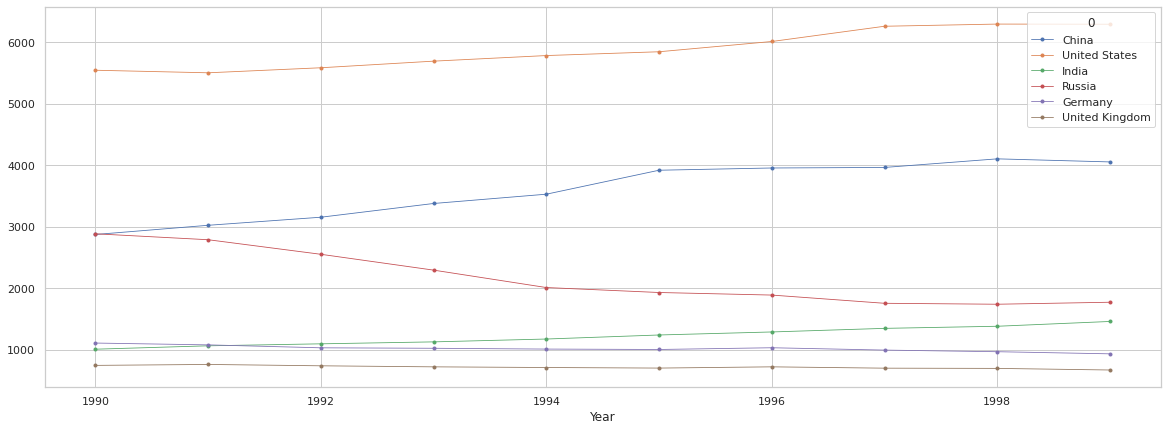

In [99]:
fig1 = hola.plot(x='Year', y= ['China', 'United States', 'India', 'Russia', 'Germany', 'United Kingdom'], 
                 figsize=(20,7), linewidth= 0.8, marker= '.')

## STORYTELING

### ¿Qué podemos leer en este gráfico?

Este gráfico nos muestra la evolución de la emisión de gases de efecto invernadero a lo largo de un intervalo de años, desde el 1990 hasta el 1999, de los países de neustro estudio (EEUU, China, India, Rusia, Alemania, Reino Unido).
Como se puede observar, la tendencia es a la alza de forma general. Alemania, Reino Unido e India parten de una base bastante inferior al resto y su tendencia es menos notoria que en el resto de países.
China, por otro lado desde el 1990 tiende a crecer en cuanto a la cantidad de gases emitidos, pero se puede ver un aumento en estas emisiones en el 1995. Algo similar ocurre con EEUU, donde la tendencia siempre es a la alza y tiene una subida en el 1997. En el caso de EEUU, la emisión comienza en un nivel bastante superior, mas de 2000 ppm por año.
El caso de Rusia es digno de mención... ¿es el único país que tiene una tendencia a la baja?... huele a chamusquina.

### Consideración con los datos de la API

Los datos interválicos de la API se dan cada 19 años, esto quiere decir que los datos pasados solo pueden ser, por ejemplo, desde 1980 hasta 1999 y los datos predictivos a futuro, desde el 2020 hasta el 2039. No podemos elegir un intervalos menor o mayor, ni para los datos pasados ni para los predictivos.

##### Pasamos a trabajar con la API, para comprar los valores con nuestros datos del dataset.

A continuación vemos los gráficos extraídos de la limpieza, ya que para la visualización individual de cada gráfico no nos aporta mucho (lo que nos interesa es la comparativa), se juntarán los gráficos que muesrtan los datos de años pasados junto a los datos de las predicciones de los años venideros.

In [101]:
df_oldtemp

,Annual_Data,Country
0,6.344341,USA
1,7.677910,Germany
2,4.626097,China
3,9.121408,UK
4,21.990156,India
5,-7.352788,Rusia


In [103]:
df_oldprec

,Annual_Data,Country
0,841.912621,USA
1,929.598637,Germany
2,808.955153,China
3,988.845497,UK
4,1018.582287,India
5,497.024078,Rusia


In [104]:
df_newtemp

,Annual_Data,Country
0,7.483289,USA
1,8.535085,Germany
2,5.728654,China
3,9.668244,UK
4,22.846838,India
5,-5.949377,Rusia


In [105]:
df_newprec

,Annual_Data,Country
0,859.000935,USA
1,949.684790,Germany
2,817.829902,China
3,1005.959857,UK
4,1018.861217,India
5,520.475287,Rusia


Aquí agrupamos los datos mencionados antes

In [106]:
df_oldtemp['Pred_Data'] = df_newtemp['Annual_Data']

In [107]:
df_oldtemp

,Annual_Data,Country,Pred_Data
0,6.344341,USA,7.483289
1,7.677910,Germany,8.535085
2,4.626097,China,5.728654
3,9.121408,UK,9.668244
4,21.990156,India,22.846838
5,-7.352788,Rusia,-5.949377


In [108]:
df_oldprec['Pred_Data'] = df_newprec['Annual_Data']

In [109]:
df_oldprec

,Annual_Data,Country,Pred_Data
0,841.912621,USA,859.000935
1,929.598637,Germany,949.684790
2,808.955153,China,817.829902
3,988.845497,UK,1005.959857
4,1018.582287,India,1018.861217
5,497.024078,Rusia,520.475287


In [111]:
fig = make_subplots(rows=2, cols=2, start_cell="top-left",
                   subplot_titles=('Old temperature vs Prediction temperature', 'Old temperature vs Prediction temperature',
                                  'Old precipitation vs Prediction precipitation', 'Old precipittion vs Prediction precipitation'))

country=list(df_oldtemp.Country.unique())

fig.add_trace(go.Bar(name='Old_Data', x=df_oldtemp.Country, y=df_oldtemp.Annual_Data), row=1, col=1)
fig.add_trace(go.Bar(name='Prediction_Data', x=df_oldtemp.Country, y=df_oldtemp.Pred_Data), row=1, col=1)

fig.add_trace(go.Line(name='Old_Data', x=df_oldtemp.Country, y=df_oldtemp.Annual_Data), row=1, col=2)
fig.add_trace(go.Line(name='Prediction_Data', x=df_oldtemp.Country, y=df_oldtemp.Pred_Data), row=1, col=2)

fig.add_trace(go.Bar(name='Old_Data', x=df_oldprec.Country, y=df_oldprec.Annual_Data), row=2, col=1)
fig.add_trace(go.Bar(name='Prediction_Data', x=df_oldprec.Country, y=df_oldprec.Pred_Data), row=2, col=1)

fig.add_trace(go.Line(name='Old_Data', x=df_oldprec.Country, y=df_oldprec.Annual_Data), row=2, col=2)
fig.add_trace(go.Line(name='Prediction_Data', x=df_oldprec.Country, y=df_oldprec.Pred_Data), row=2, col=2)

                              


fig.update_layout(height=1000, width=1050, title_text="CONCLUSIONES GRÁFICAS")
fig.show()


## STORYTELLING

### Muy bonito pero, ¿qué vemos aquí?

En esta figura de cuatro gráficos (subplot), tenemos realmente dos cosas por las que preocuparnos.
- Los dos primeros gráficos hablan de lo mismo, pero con distinta presentación para un mayor entendimiento (o para los que prefieran barras o líneas). Lo que se está comprando son las temperaturas de nuestros 6 países de estudio, de los años desde 1990 hasta el 1999 en comparación con las predicciones desde el 2020 hasta el 2039. (se ha hecho una media de cada intervalo, para poder ser representados de uma manera más explicativa). Lo que se ve es una tendencia de una elevación de las temperaturas, en algunas ocasiones de más de 1 grado de diferencia entre las medias de estos dos intervalos. 
- Los dos gráficos de abajo tienen la misma lógica gráfica que los de arriba (se llega a la misma conclusión observando cualquiera de los dos, el estudio se puede hacer al gusto). Eneste caso estamos comparando cómo han y van a cambiar las precipitaciones en el mismo intervalo de tiempo que el estudio de la temperatura. En este estudio la diferenceia no es tan notoria, no hay tanta variación de unos años a otros, pese que aún así tiende a la alza ¿por que?
    - No está directamente relacionado el hecho de que haya un aumento de emisión de gases de efecto invernadero con el aumento de las lluvias. Lo que ocurre es que sin embargo, como se ha visto en el gráfico anterior, la tempreatura si que aumenta directamente con el aumento de la emisión de estos gases, y el hecho de que la temperatura eumente, genera un aumento en la concentración de humedad en la atmósfera, lo que provoca, no aumento en la cantidad de lluvias, pero sí en su fuerza, en la cantidad de litros/metros cuadrados. (esto nos cuadra, los datos no son solo de eventos de lluvia, cuantitativamente, si no, nos dan el agua total por lluvias, es decir que puede haber o más eventos o eventos más fuertes.)
    - Y es por este motivo por el que cada vez han más inundaciones, eventos mucho más fuertes que hace 20 años en zonas donde no están preparados a recibir esas lluvias tan fuertes.